In [2]:
%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
def load_and_preprocess_data(filepath):
    """Load CSV file and preprocess the data"""
    # Read the CSV file
    df = pd.read_csv(filepath)
    
    print("Dataset Shape:", df.shape)
    print("\nColumn Names:")
    print(df.columns.tolist())
    print("\nFirst few rows:")
    print(df.head())
    print("\nData Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    # Handle missing values
    df = df.dropna()
    
    # Select numerical features for clustering
    # Adjust these column names based on your actual CSV structure
    numerical_features = ['Open', 'High', 'Low', 'Last', 'Close', 
                         'Total Trade', 'Quantity', 'Turnover (Lacs)']
    
    # Filter to include only columns that exist in the dataframe
    numerical_features = [col for col in numerical_features if col in df.columns]
    
    print(f"\nUsing features: {numerical_features}")
    
    X = df[numerical_features].copy()
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return df, X, X_scaled, numerical_features, scaler


In [4]:
def perform_kmeans(X_scaled, n_clusters=3):
    """Perform K-means clustering"""
    print("\n" + "="*60)
    print("K-MEANS CLUSTERING")
    print("="*60)
    
    # Find optimal number of clusters using elbow method
    inertias = []
    silhouette_scores = []
    K_range = range(2, 11)
    
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    
    # Plot elbow curve and silhouette scores
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    ax1.plot(K_range, inertias, 'bo-')
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Elbow Method for Optimal K')
    ax1.grid(True)
    
    ax2.plot(K_range, silhouette_scores, 'ro-')
    ax2.set_xlabel('Number of Clusters (k)')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Score vs Number of Clusters')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Perform K-means with specified number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    print(f"\nK-Means with {n_clusters} clusters:")
    print(f"Inertia: {kmeans.inertia_:.2f}")
    print(f"Silhouette Score: {silhouette_score(X_scaled, labels):.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled, labels):.4f}")
    
    return labels, kmeans

In [5]:
def perform_gmm(X_scaled, n_components=3):
    """Perform Gaussian Mixture Model clustering"""
    print("\n" + "="*60)
    print("GAUSSIAN MIXTURE MODEL")
    print("="*60)
    
    # Find optimal number of components using BIC and AIC
    n_components_range = range(2, 11)
    bic_scores = []
    aic_scores = []
    
    for n in n_components_range:
        gmm = GaussianMixture(n_components=n, random_state=42)
        gmm.fit(X_scaled)
        bic_scores.append(gmm.bic(X_scaled))
        aic_scores.append(gmm.aic(X_scaled))
    
    # Plot BIC and AIC scores
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    ax1.plot(n_components_range, bic_scores, 'go-')
    ax1.set_xlabel('Number of Components')
    ax1.set_ylabel('BIC Score')
    ax1.set_title('BIC Score vs Number of Components')
    ax1.grid(True)
    
    ax2.plot(n_components_range, aic_scores, 'mo-')
    ax2.set_xlabel('Number of Components')
    ax2.set_ylabel('AIC Score')
    ax2.set_title('AIC Score vs Number of Components')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Perform GMM with specified number of components
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    labels = gmm.fit_predict(X_scaled)
    
    print(f"\nGMM with {n_components} components:")
    print(f"BIC Score: {gmm.bic(X_scaled):.2f}")
    print(f"AIC Score: {gmm.aic(X_scaled):.2f}")
    print(f"Silhouette Score: {silhouette_score(X_scaled, labels):.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled, labels):.4f}")
    
    return labels, gmm

In [6]:
def perform_hierarchical(X_scaled, n_clusters=3):
    """Perform Hierarchical clustering"""
    print("\n" + "="*60)
    print("HIERARCHICAL CLUSTERING")
    print("="*60)
    
    # Perform hierarchical clustering
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = hierarchical.fit_predict(X_scaled)
    
    print(f"\nHierarchical Clustering with {n_clusters} clusters:")
    print(f"Silhouette Score: {silhouette_score(X_scaled, labels):.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled, labels):.4f}")
    
    # Create dendrogram (use sample of data if dataset is large)
    sample_size = min(100, len(X_scaled))
    sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)
    X_sample = X_scaled[sample_indices]
    
    plt.figure(figsize=(15, 7))
    linkage_matrix = linkage(X_sample, method='ward')
    dendrogram(linkage_matrix)
    plt.title('Hierarchical Clustering Dendrogram (Sample of 100 points)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()
    
    return labels, hierarchical

In [7]:
def perform_pca(X_scaled, n_components=2):
    """Perform Principal Component Analysis"""
    print("\n" + "="*60)
    print("PRINCIPAL COMPONENT ANALYSIS (PCA)")
    print("="*60)
    
    # Perform PCA with all components first to analyze variance
    pca_full = PCA()
    pca_full.fit(X_scaled)
    
    # Plot explained variance ratio
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Individual variance
    ax1.bar(range(1, len(pca_full.explained_variance_ratio_) + 1),
            pca_full.explained_variance_ratio_)
    ax1.set_xlabel('Principal Component')
    ax1.set_ylabel('Explained Variance Ratio')
    ax1.set_title('Variance Explained by Each Principal Component')
    ax1.grid(True, alpha=0.3)
    
    # Cumulative variance
    cumsum_variance = np.cumsum(pca_full.explained_variance_ratio_)
    ax2.plot(range(1, len(cumsum_variance) + 1), cumsum_variance, 'ro-')
    ax2.axhline(y=0.95, color='b', linestyle='--', label='95% Variance')
    ax2.set_xlabel('Number of Components')
    ax2.set_ylabel('Cumulative Explained Variance')
    ax2.set_title('Cumulative Variance Explained')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nExplained Variance Ratio (first 5 components):")
    for i, var in enumerate(pca_full.explained_variance_ratio_[:5]):
        print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")
    
    print(f"\nCumulative Variance Explained:")
    for i in [2, 3, 4, 5]:
        if i <= len(cumsum_variance):
            print(f"First {i} components: {cumsum_variance[i-1]:.4f} ({cumsum_variance[i-1]*100:.2f}%)")
    
    # Perform PCA with specified number of components
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    print(f"\nPCA with {n_components} components:")
    print(f"Total Variance Explained: {sum(pca.explained_variance_ratio_):.4f} ({sum(pca.explained_variance_ratio_)*100:.2f}%)")
    
    return X_pca, pca

In [8]:
def visualize_clusters(X_pca, labels, title, method_name):
    """Visualize clusters in 2D PCA space"""
    plt.figure(figsize=(10, 7))
    
    unique_labels = np.unique(labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    
    for label, color in zip(unique_labels, colors):
        mask = labels == label
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                   c=[color], label=f'Cluster {label}',
                   alpha=0.6, edgecolors='black', linewidth=0.5, s=50)
    
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def compare_clustering_methods(X_pca, kmeans_labels, gmm_labels, hierarchical_labels):
    """Compare all three clustering methods"""
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    
    methods = [
        (kmeans_labels, 'K-Means Clustering', axes[0]),
        (gmm_labels, 'Gaussian Mixture Model', axes[1]),
        (hierarchical_labels, 'Hierarchical Clustering', axes[2])
    ]
    
    for labels, title, ax in methods:
        unique_labels = np.unique(labels)
        colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
        
        for label, color in zip(unique_labels, colors):
            mask = labels == label
            ax.scatter(X_pca[mask, 0], X_pca[mask, 1],
                      c=[color], label=f'Cluster {label}',
                      alpha=0.6, edgecolors='black', linewidth=0.5, s=50)
        
        ax.set_xlabel('First Principal Component')
        ax.set_ylabel('Second Principal Component')
        ax.set_title(title)
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def analyze_clusters(df, labels, method_name, feature_names):
    """Analyze cluster characteristics"""
    print(f"\n{method_name} - Cluster Analysis:")
    print("="*60)
    
    df_clustered = df.copy()
    df_clustered['Cluster'] = labels
    
    print(f"\nCluster Sizes:")
    print(df_clustered['Cluster'].value_counts().sort_index())
    
    print(f"\nCluster Statistics:")
    cluster_stats = df_clustered.groupby('Cluster')[feature_names].mean()
    print(cluster_stats)
    
    return df_clustered

In [9]:
def main(filepath, n_clusters=3):
    """Main execution function"""
    print("="*60)
    print("STOCK MARKET DATA CLUSTERING AND PCA ANALYSIS")
    print("="*60)
    
    # Load and preprocess data
    df, X, X_scaled, feature_names, scaler = load_and_preprocess_data(filepath)
    
    # Perform PCA first
    X_pca, pca = perform_pca(X_scaled, n_components=2)
    
    # Perform K-Means clustering
    kmeans_labels, kmeans_model = perform_kmeans(X_scaled, n_clusters=n_clusters)
    visualize_clusters(X_pca, kmeans_labels, 'K-Means Clustering Results', 'kmeans')
    df_kmeans = analyze_clusters(df, kmeans_labels, 'K-Means', feature_names)
    
    # Perform GMM clustering
    gmm_labels, gmm_model = perform_gmm(X_scaled, n_components=n_clusters)
    visualize_clusters(X_pca, gmm_labels, 'GMM Clustering Results', 'gmm')
    df_gmm = analyze_clusters(df, gmm_labels, 'GMM', feature_names)
    
    # Perform Hierarchical clustering
    hierarchical_labels, hierarchical_model = perform_hierarchical(X_scaled, n_clusters=n_clusters)
    visualize_clusters(X_pca, hierarchical_labels, 'Hierarchical Clustering Results', 'hierarchical')
    df_hierarchical = analyze_clusters(df, hierarchical_labels, 'Hierarchical', feature_names)
    
    # Compare all methods
    print("\n" + "="*60)
    print("COMPARISON OF CLUSTERING METHODS")
    print("="*60)
    compare_clustering_methods(X_pca, kmeans_labels, gmm_labels, hierarchical_labels)
    
    # Print comparison metrics
    methods_comparison = pd.DataFrame({
        'Method': ['K-Means', 'GMM', 'Hierarchical'],
        'Silhouette Score': [
            silhouette_score(X_scaled, kmeans_labels),
            silhouette_score(X_scaled, gmm_labels),
            silhouette_score(X_scaled, hierarchical_labels)
        ],
        'Davies-Bouldin Index': [
            davies_bouldin_score(X_scaled, kmeans_labels),
            davies_bouldin_score(X_scaled, gmm_labels),
            davies_bouldin_score(X_scaled, hierarchical_labels)
        ]
    })
    
    print("\nClustering Methods Comparison:")
    print(methods_comparison)
    
    # Save results
    df_kmeans.to_csv('stock_data_kmeans_clustered.csv', index=False)
    df_gmm.to_csv('stock_data_gmm_clustered.csv', index=False)
    df_hierarchical.to_csv('stock_data_hierarchical_clustered.csv', index=False)
    
    print("\n" + "="*60)
    print("Analysis Complete! Results saved to CSV files.")
    print("="*60)
    
    return {
        'df': df,
        'X_scaled': X_scaled,
        'X_pca': X_pca,
        'pca': pca,
        'kmeans': (kmeans_labels, kmeans_model),
        'gmm': (gmm_labels, gmm_model),
        'hierarchical': (hierarchical_labels, hierarchical_model)
    }

STOCK MARKET DATA CLUSTERING AND PCA ANALYSIS
Dataset Shape: (1235, 8)

Column Names:
['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity', 'Turnover (Lacs)']

First few rows:
         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-10-08  208.00  222.25  206.85  216.00  215.15             4642146.0   
1  2018-10-05  217.00  218.60  205.90  210.25  209.20             3519515.0   
2  2018-10-04  223.50  227.80  216.15  217.25  218.20             1728786.0   
3  2018-10-03  230.00  237.50  225.75  226.45  227.60             1708590.0   
4  2018-10-01  234.55  234.60  221.05  230.30  230.90             1534749.0   

   Turnover (Lacs)  
0         10062.83  
1          7407.06  
2          3815.79  
3          3960.27  
4          3486.05  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------

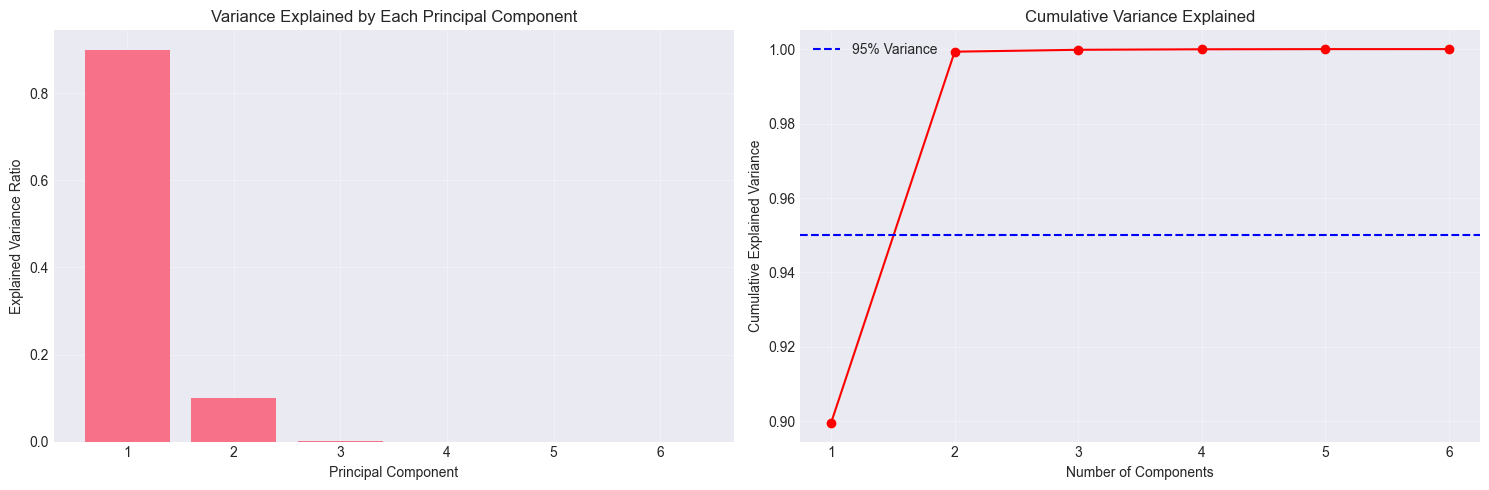


Explained Variance Ratio (first 5 components):
PC1: 0.8996 (89.96%)
PC2: 0.0997 (9.97%)
PC3: 0.0005 (0.05%)
PC4: 0.0001 (0.01%)
PC5: 0.0000 (0.00%)

Cumulative Variance Explained:
First 2 components: 0.9993 (99.93%)
First 3 components: 0.9998 (99.98%)
First 4 components: 1.0000 (100.00%)
First 5 components: 1.0000 (100.00%)

PCA with 2 components:
Total Variance Explained: 0.9993 (99.93%)

K-MEANS CLUSTERING


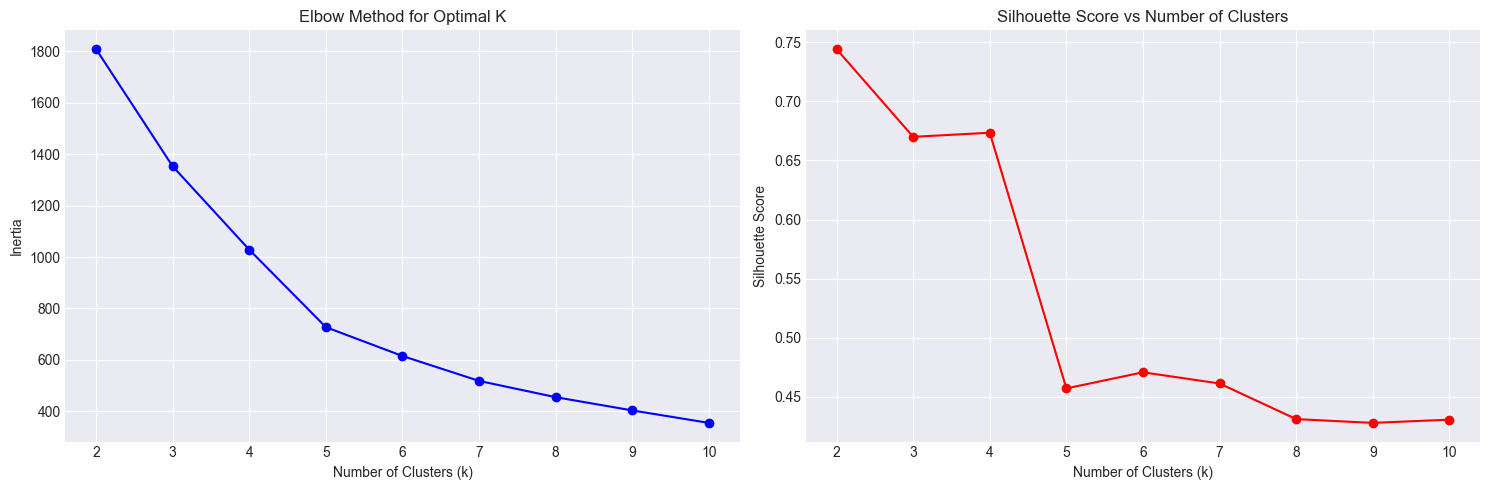


K-Means with 3 clusters:
Inertia: 1352.72
Silhouette Score: 0.6700
Davies-Bouldin Index: 0.8573


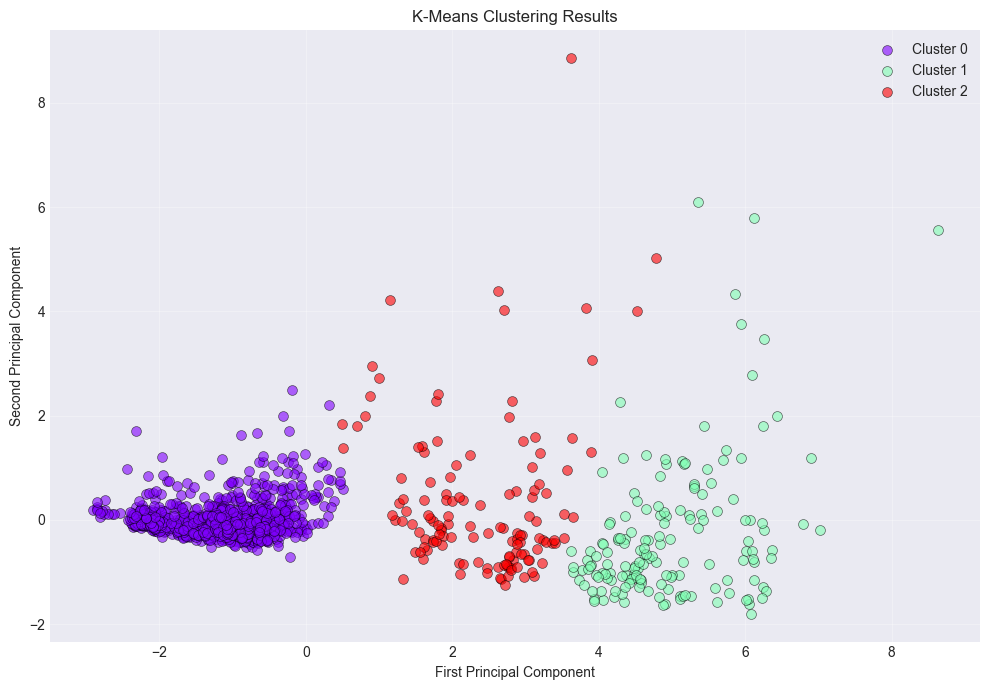


K-Means - Cluster Analysis:

Cluster Sizes:
Cluster
0    943
1    160
2    132
Name: count, dtype: int64

Cluster Statistics:
               Open        High         Low        Last       Close  \
Cluster                                                               
0        143.005355  144.909756  140.967338  142.688176  142.711559   
1        280.359688  284.769375  275.836875  280.474063  280.374062   
2        219.300379  223.499242  215.460227  219.383333  219.287879   

         Turnover (Lacs)  
Cluster                   
0            3009.928123  
1           11084.539750  
2           10374.409470  

GAUSSIAN MIXTURE MODEL


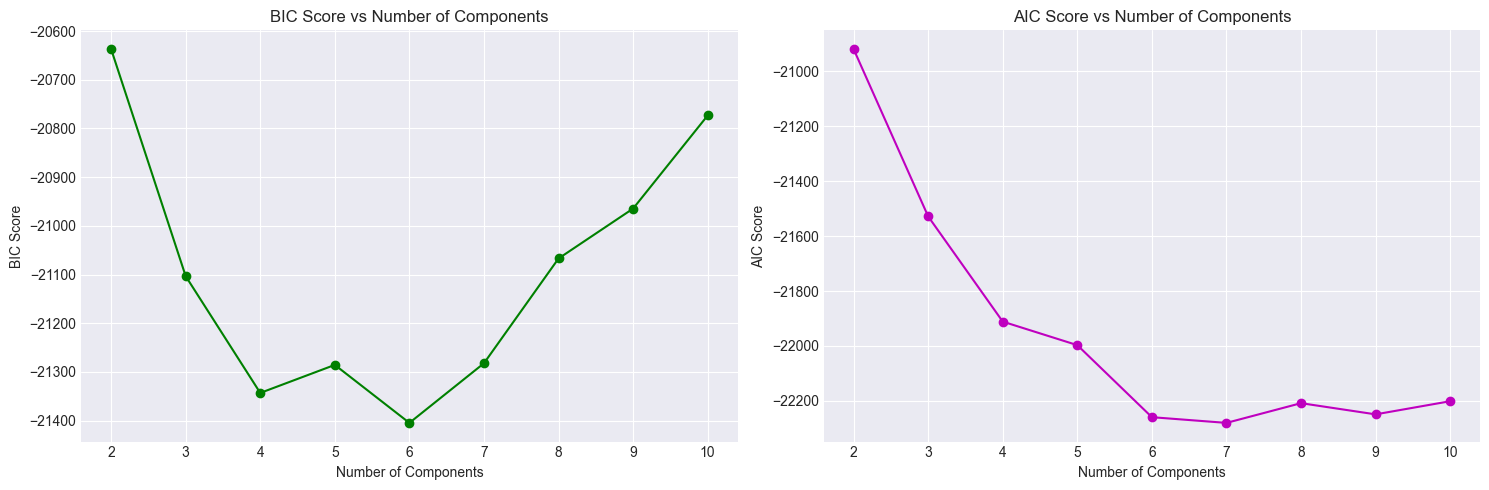


GMM with 3 components:
BIC Score: -21103.38
AIC Score: -21528.24
Silhouette Score: 0.3931
Davies-Bouldin Index: 1.9118


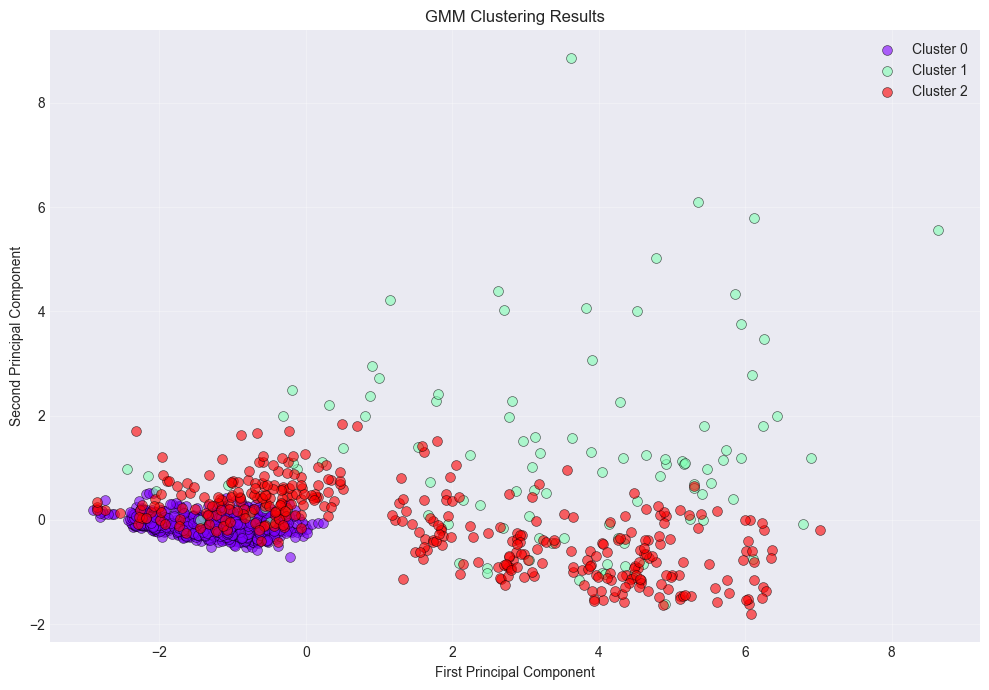


GMM - Cluster Analysis:

Cluster Sizes:
Cluster
0    761
1    103
2    371
Name: count, dtype: int64

Cluster Statistics:
               Open        High         Low        Last       Close  \
Cluster                                                               
0        141.859658  143.408213  140.098357  141.403285  141.441853   
1        233.468447  239.582524  226.844175  233.149029  233.143689   
2        206.622102  209.984501  203.576954  206.919542  206.824259   

         Turnover (Lacs)  
Cluster                   
0            2299.105611  
1           16351.328835  
2            6866.588652  

HIERARCHICAL CLUSTERING

Hierarchical Clustering with 3 clusters:
Silhouette Score: 0.6786
Davies-Bouldin Index: 0.9191


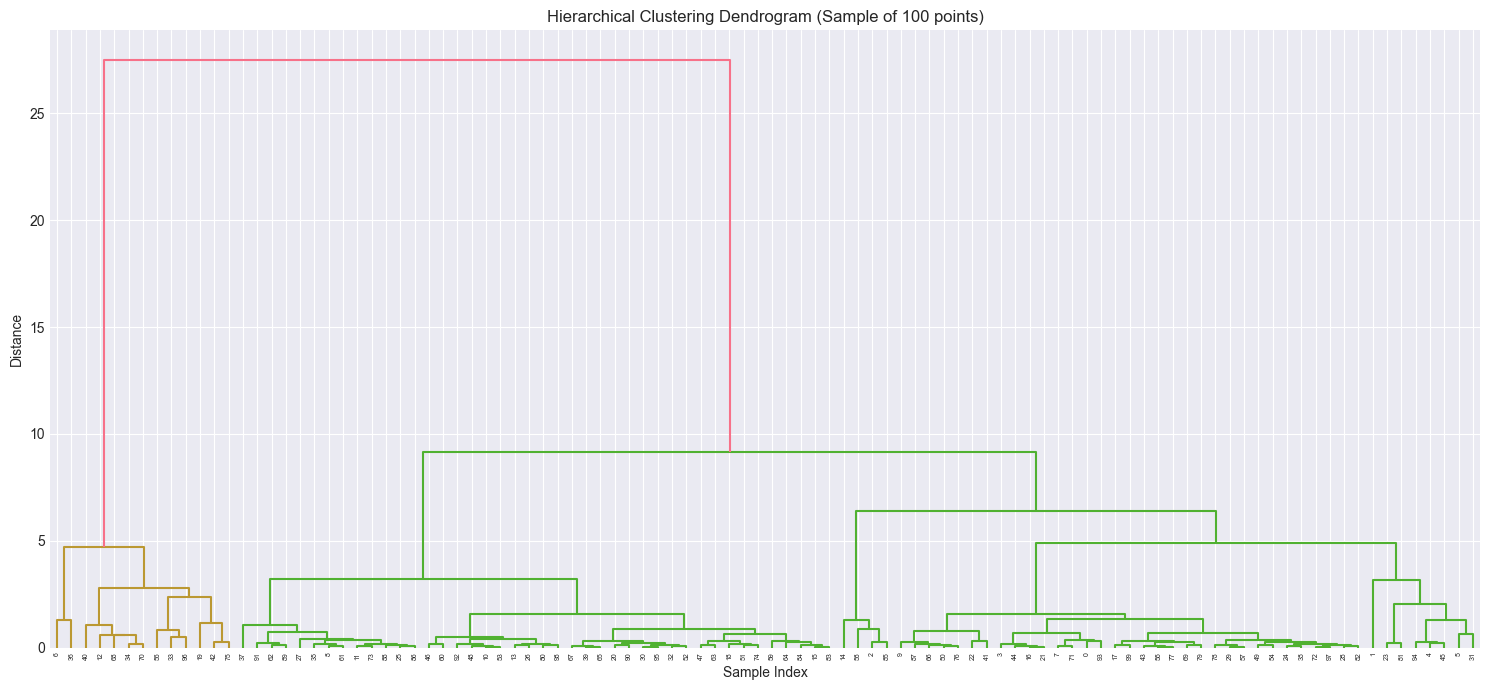

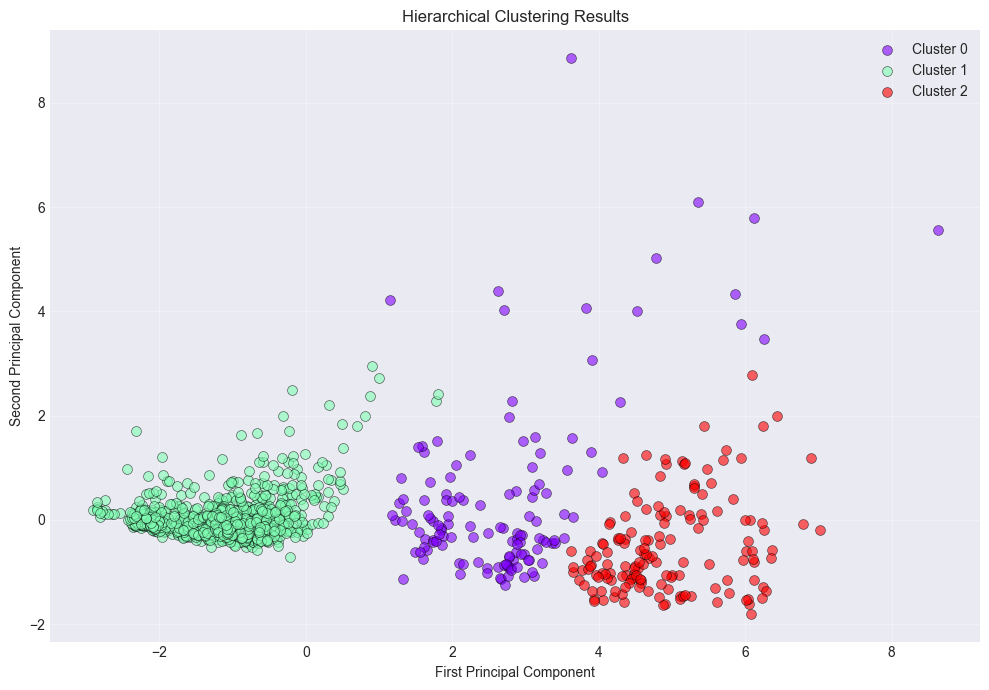


Hierarchical - Cluster Analysis:

Cluster Sizes:
Cluster
0    131
1    952
2    152
Name: count, dtype: int64

Cluster Statistics:
               Open        High         Low        Last       Close  \
Cluster                                                               
0        225.419084  229.803817  221.338168  225.462214  225.332824   
1        143.308036  145.243172  141.257616  143.006985  143.032931   
2        280.921711  285.125658  276.541447  280.994737  280.900658   

         Turnover (Lacs)  
Cluster                   
0           11345.270687  
1            3147.994842  
2            9856.507105  

COMPARISON OF CLUSTERING METHODS


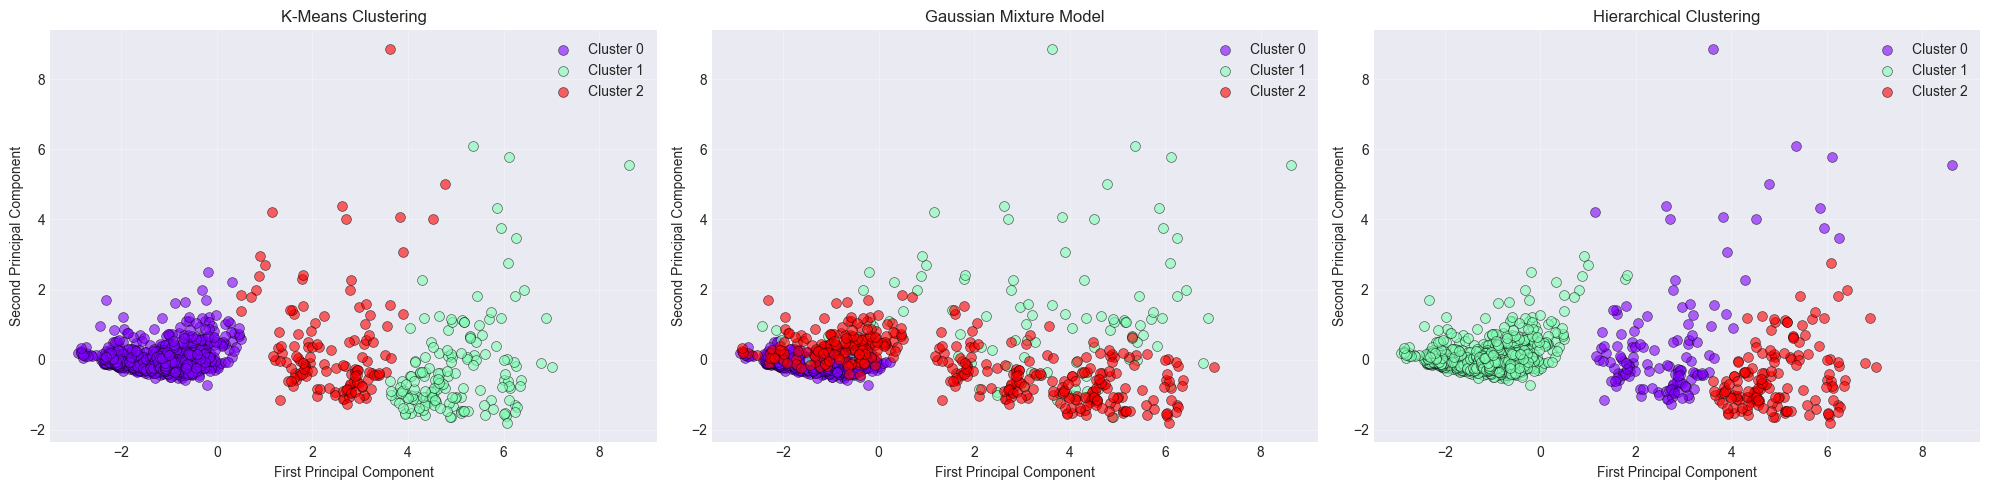


Clustering Methods Comparison:
         Method  Silhouette Score  Davies-Bouldin Index
0       K-Means          0.669999              0.857345
1           GMM          0.393136              1.911850
2  Hierarchical          0.678642              0.919106

Analysis Complete! Results saved to CSV files.


Analysis complete! Check the generated visualizations and CSV files.

You can access the results using:
- results['df']: Original dataframe
- results['X_pca']: PCA-transformed data
- results['kmeans']: K-means results
- results['gmm']: GMM results
- results['hierarchical']: Hierarchical clustering results


In [10]:
if __name__ == "__main__":
    # Replace with your CSV file path
    filepath = 'TATA.csv'  # Change this to your file path
    
    # Run the analysis with 3 clusters (you can change this number)
    results = main(filepath, n_clusters=3)
    
    print("\n\nAnalysis complete! Check the generated visualizations and CSV files.")
    print("\nYou can access the results using:")
    print("- results['df']: Original dataframe")
    print("- results['X_pca']: PCA-transformed data")
    print("- results['kmeans']: K-means results")
    print("- results['gmm']: GMM results")
    print("- results['hierarchical']: Hierarchical clustering results")